# Integrantes

Numero de Cuenta-Nombre

20211021557-Erick Josue Sosa Aleman 

20221001175-Jose Francisco Vargas Carrasco

In [1]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm



# Leer Dataset

In [2]:
#Enlace del dataset original
#https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset

dataset=pd.read_csv("Dataset/Churn_Modelling.csv")

dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Limpieza de Datos


Eliminar la columna RowNumber que es Redundante al ya tener CustomerID

In [3]:
#Eliminamos una columna redundante que es el RowNumber
df=dataset.drop(columns=['RowNumber'])
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analizar Tipos de Datos 

In [4]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

El nombre de las columnas es claro y estandarizado por ende no es necesario un renombramiento

# Descripcion y Clasificacion de 

- **CustomerId**: Identificador único del cliente (tipo: int64).
- **Surname**: Apellido(Sobrenombre) del cliente (tipo: object).
- **CreditScore**: Puntuación de crédito del cliente (tipo: int64).
- **Geography**: País de residencia del cliente (tipo: object).
- **Gender**: Género del cliente (tipo: object).
- **Age**: Edad del cliente (tipo: int64).
- **Tenure**: Tiempo en años que el cliente ha estado con la empresa (tipo: int64).
- **Balance**: Saldo de la cuenta del cliente (tipo: float64).
- **NumOfProducts**: Número de productos que el cliente tiene con la empresa (tipo: int64).
- **HasCrCard**: Indica si el cliente tiene tarjeta de crédito (tipo: int64).
- **IsActiveMember**: Indica si el cliente es un miembro activo (tipo: int64).
- **EstimatedSalary**: Salario estimado del cliente (tipo: float64).
- **Exited**: Indica si el cliente ha dejado la empresa (tipo: int64).


| Numericas       | Categoricas   | Otras     |
| --------------- | ------------- | --------- |
| CreditScore     | Geography     | CustomerID|
| Age             | Gender        | Surname   |
| Tenure          | HasCrCard     |           |
| Balance         | IsActiveMember|           |
| NumOfProducts   | Exited        |           |
| EstimatedSalary |               |           |

# Haciendo un Analisis Exploratorio de los Datos

### Primero vamos convertir la columnas numericas discretas a String

In [5]:
df["HasCrCard"] = df["HasCrCard"].astype(str)
df["IsActiveMember"] = df["IsActiveMember"].astype(str)
df["Exited"] = df["Exited"].astype(str)

In [6]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

### Hacemos un describe del detaset original

In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


#### Observando la distribucion de las categorias principales

In [9]:
cat_cols = [ c for c in df.columns if df[c].dtype == "object" ]

del cat_cols[0]

cat_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [10]:
for a in cat_cols:
    print( df[a].value_counts(), "\n" )

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64 

Exited
0    7963
1    2037
Name: count, dtype: int64 



### Agrupando la informacion para obtener las distribuciones probabilisticas

Estaremos usando las siguientes categorías:

- Geography
- Gender
- HasCrCard

In [12]:
prob_freq = df.groupby( ["Geography", "Gender", "HasCrCard"], as_index= False ).agg({
    "CustomerId": ["count"]
})

In [14]:
prob_freq

,Geography,Gender,HasCrCard,CustomerId
,,,,count
0,France,Female,0,683
1,France,Female,1,1578
2,France,Male,0,788
3,France,Male,1,1965
4,Germany,Female,0,350
5,Germany,Female,1,843
6,Germany,Male,0,368
7,Germany,Male,1,948
8,Spain,Female,0,318


# Comparacion entre el dataset original y el dataset simulado

In [6]:
#El nombre del dataset simulado es df_simulado 
df_simulado=df

## Comparacion entre distribuciones uniformes

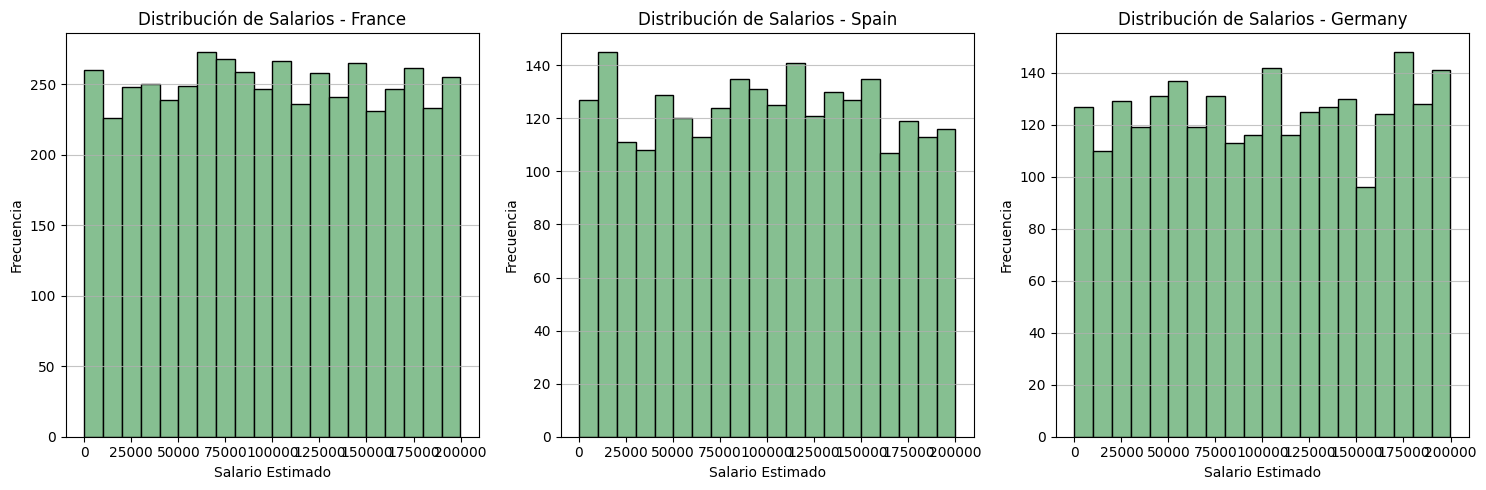

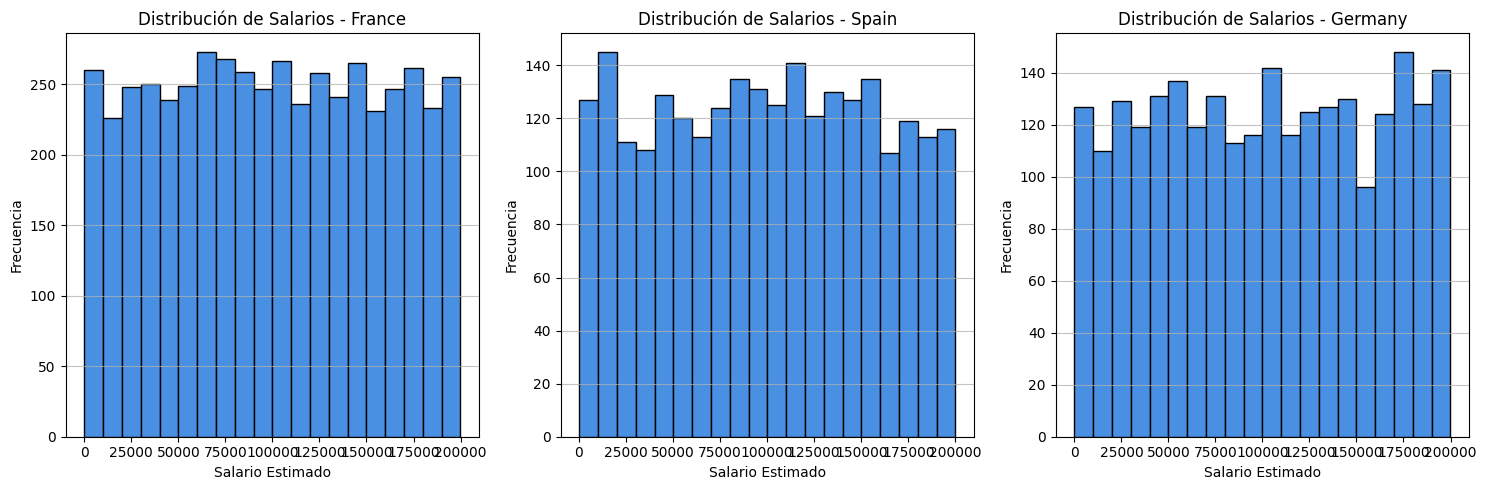

In [21]:
# Obtener la lista de países únicos
paises = df['Geography'].unique()

# Configurar el gráfico
plt.figure(figsize=(15, 5))

# Crear un histograma para cada país
for i, pais in enumerate(paises, 1):
    plt.subplot(1, len(paises), i)
    datos_pais = df[df['Geography'] == pais]['EstimatedSalary']
    plt.hist(datos_pais, bins=20, color='#86bf91', edgecolor='black',)
    plt.title(f'Distribución de Salarios - {pais}')
    plt.xlabel('Salario Estimado')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Configurar el gráfico
plt.figure(figsize=(15, 5))

# Crear un histograma para cada país
for i, pais in enumerate(paises, 1):
    plt.subplot(1, len(paises), i)
    datos_pais = df_simulado[df_simulado['Geography'] == pais]['EstimatedSalary']
    plt.hist(datos_pais, bins=20, color='#4A90E2', edgecolor='black',)
    plt.title(f'Distribución de Salarios - {pais}')
    plt.xlabel('Salario Estimado')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

## Comparacion entre distribuciones normales

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

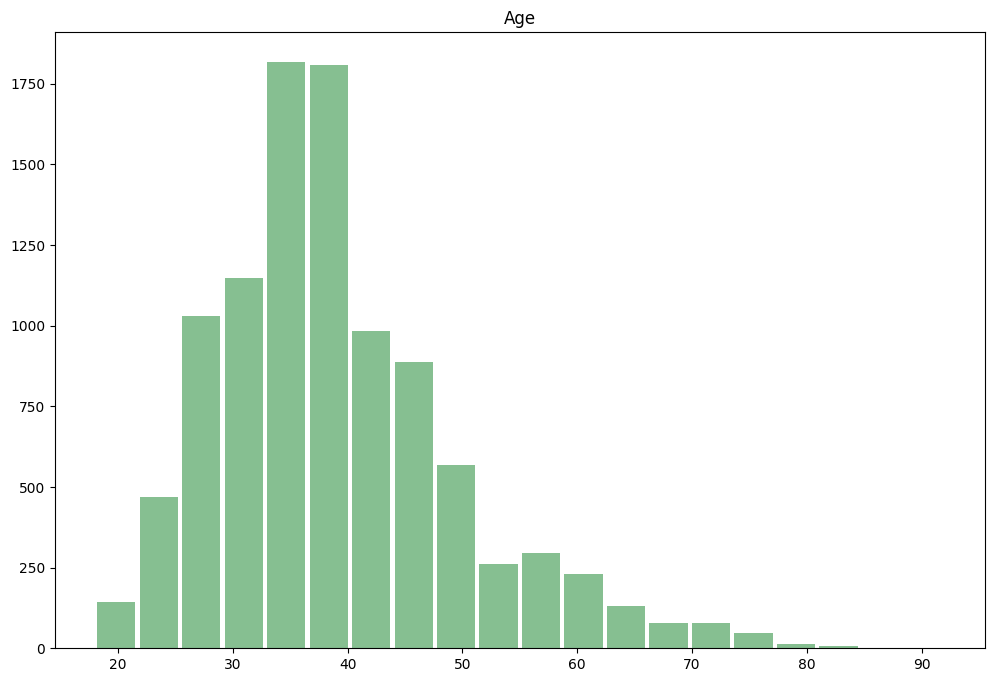

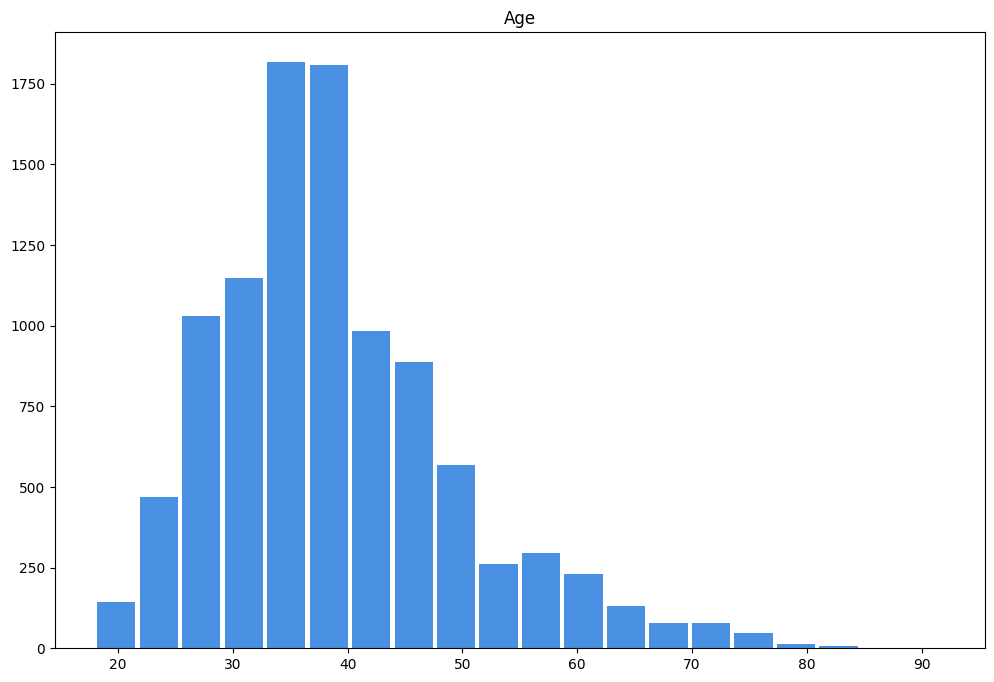

In [18]:
df.hist(column='Age', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='Age', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'CreditScore'}>]], dtype=object)

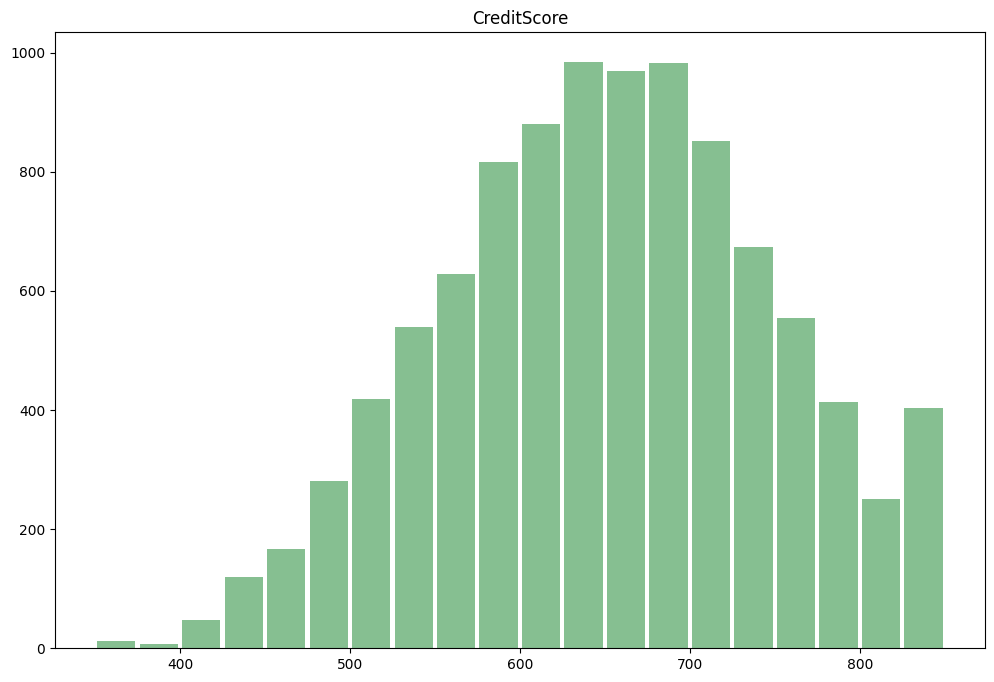

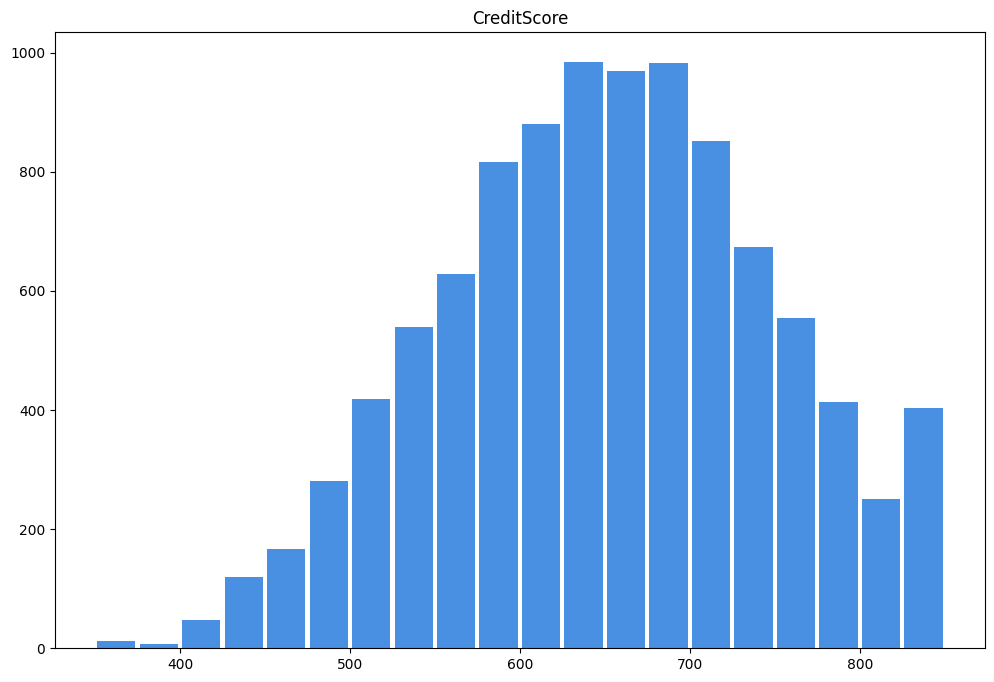

In [58]:
df.hist(column='CreditScore', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='CreditScore', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'Balance'}>]], dtype=object)

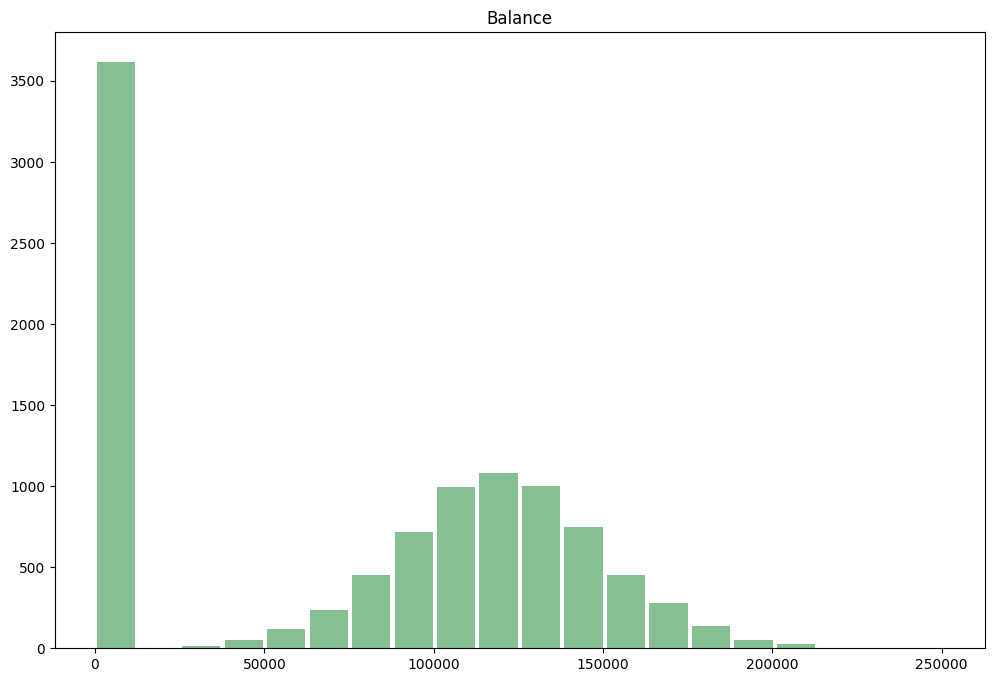

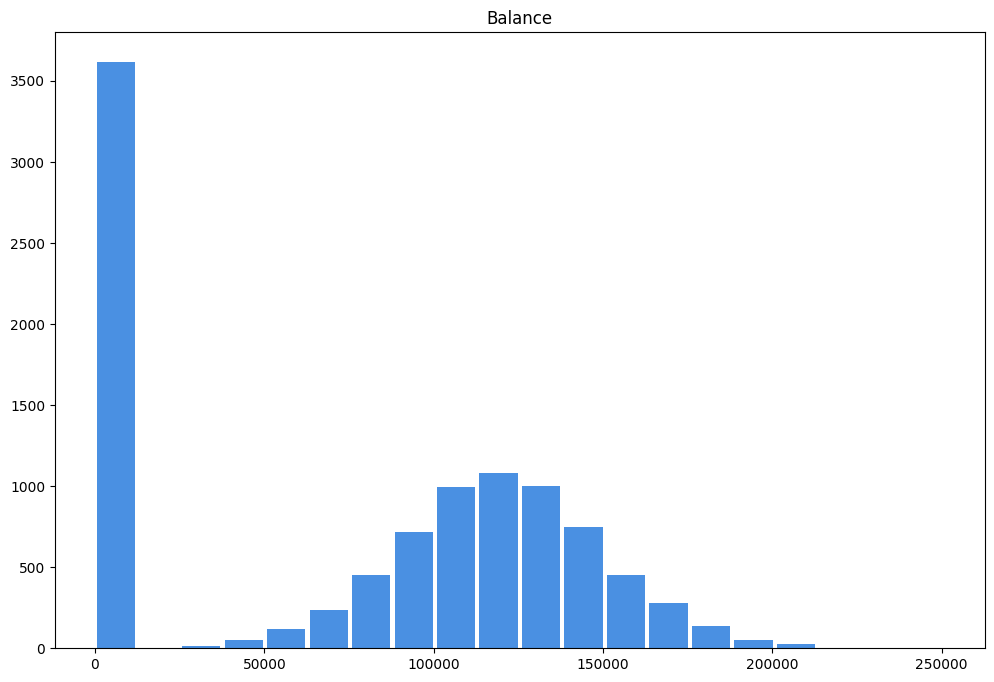

In [22]:
df.hist(column='Balance', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='Balance', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

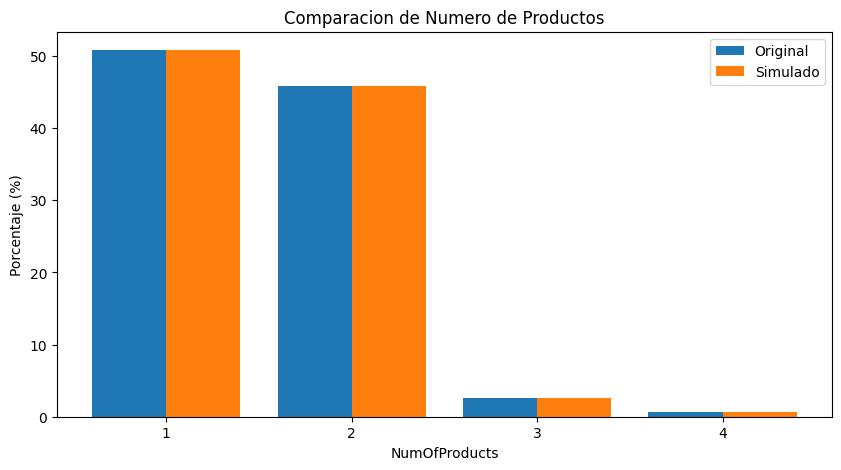

In [56]:
def comparar_barras(df1, df2, columna, nombre1='Original', nombre2='Simulado',title=''):
    """
    Versión simplificada para comparar distribuciones entre dos DataFrames
    """
    # Calcular frecuencias relativas
    dist1 = df1[columna].value_counts(normalize=True).sort_index()
    dist2 = df2[columna].value_counts(normalize=True).sort_index()
    
    # Unir categorías
    categorias = dist1.index.union(dist2.index)
    dist1 = dist1.reindex(categorias, fill_value=0)
    dist2 = dist2.reindex(categorias, fill_value=0)
    
    # Configurar gráfico
    plt.figure(figsize=(10, 5))
    ancho = 0.4
    
    # Posiciones de las barras
    posiciones = range(len(categorias))
    
    plt.bar([p - ancho/2 for p in posiciones], dist1*100, width=ancho, label=nombre1)
    plt.bar([p + ancho/2 for p in posiciones], dist2*100, width=ancho, label=nombre2)
    
    # Personalización básica
    plt.title(f'{title}')
    plt.xlabel(columna)
    plt.ylabel('Porcentaje (%)')
    plt.xticks(posiciones, categorias)
    plt.legend()
    plt.show()

# Ejemplo de uso:
comparar_barras(df, df_simulado, 'NumOfProducts',title='Comparacion de Numero de Productos')

## Comparacion entre variables cualitativas

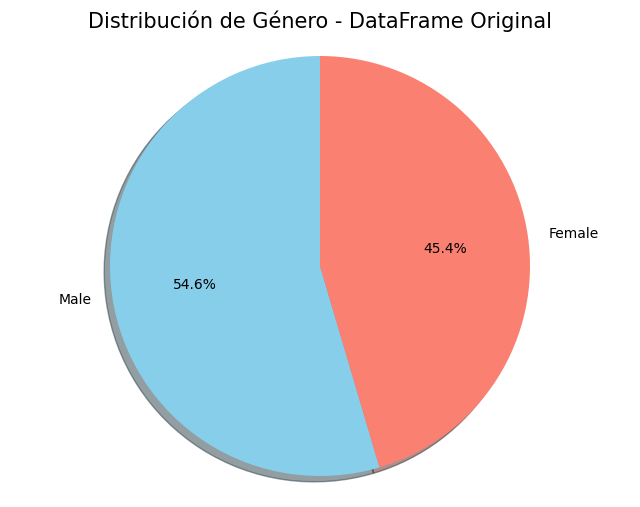

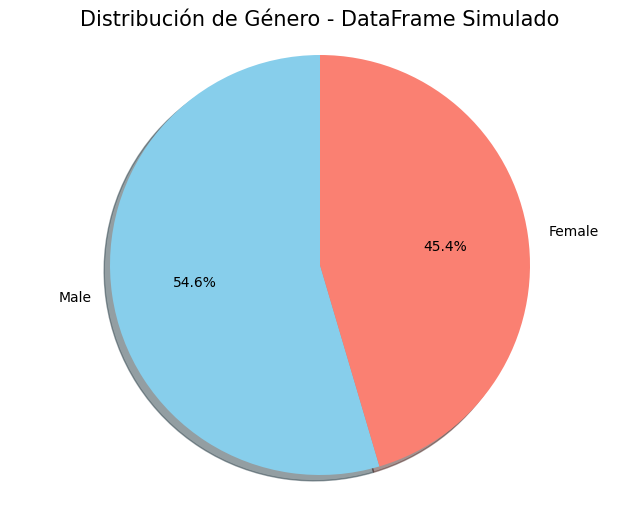

In [32]:
def PieChart(distribucion, titulo):
    plt.figure(figsize=(8, 6))
    plt.pie(
        distribucion,
        labels=distribucion.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'salmon'],
        shadow=True
    )

    plt.title(titulo, fontsize=15)
    plt.axis('equal')  # Para asegurar que el gráfico sea circular
    plt.show()

PieChart(df['Gender'].value_counts(), 'Distribución de Género - DataFrame Original')    
PieChart(df_simulado['Gender'].value_counts(), 'Distribución de Género - DataFrame Simulado')    

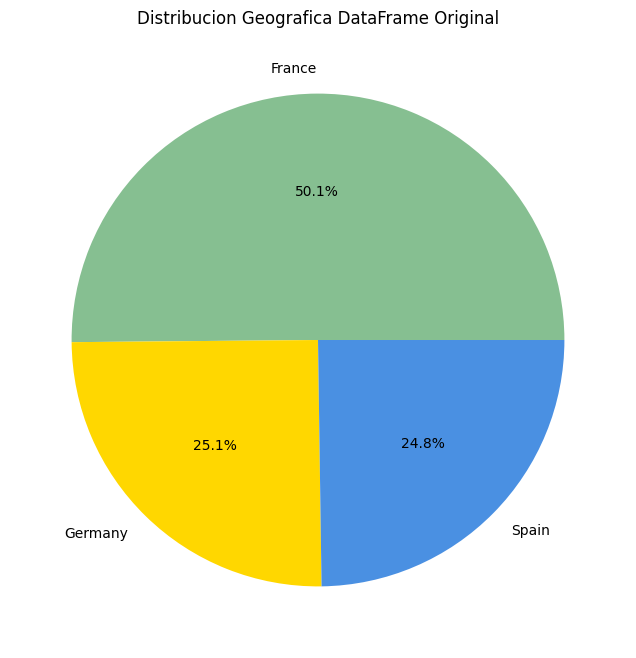

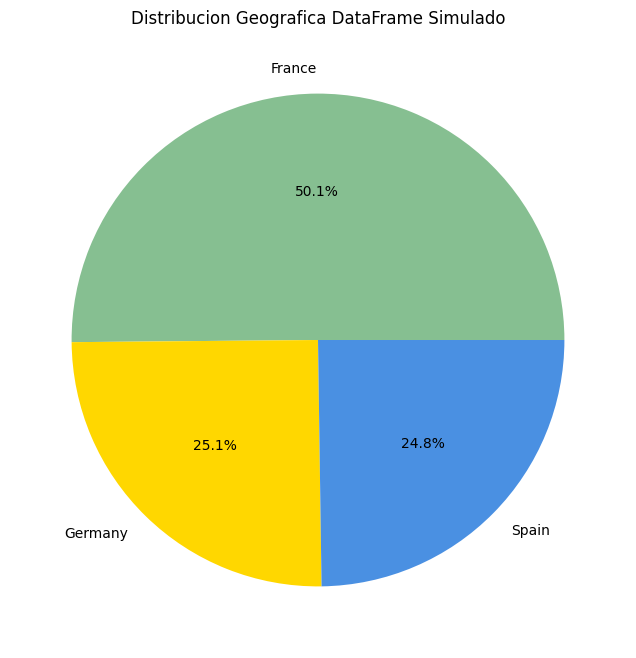

In [57]:
# Contar la frecuencia de cada ubicación geográfica en df
geography_counts_df = df['Geography'].value_counts()

# Contar la frecuencia de cada ubicación geográfica en df_simulado
geography_counts_df_simulado = df_simulado['Geography'].value_counts()

# Definir colores específicos para cada ubicación geográfica
colors = {
    'France': '#86bf91', 
    'Spain': '#4A90E2',   
    'Germany': '#FFD700'   
}

# Asignar colores a las ubicaciones geográficas en el gráfico de pastel para df
color_list_df = [colors.get(geo) for geo in geography_counts_df.index]

# Asignar colores a las ubicaciones geográficas en el gráfico de pastel para df_simulado
color_list_df_simulado = [colors.get(geo) for geo in geography_counts_df_simulado.index]

# Crear el pie chart para df
plt.figure(figsize=(8,8))
plt.pie(geography_counts_df,
        labels=geography_counts_df.index,
        autopct='%1.1f%%',
        colors=color_list_df)
plt.title('Distribucion Geografica DataFrame Original')


# Crear el pie chart para df_simulado
plt.figure(figsize=(8,8))
plt.pie(geography_counts_df_simulado,
        labels=geography_counts_df_simulado.index,
        autopct='%1.1f%%',
        colors=color_list_df_simulado)
plt.title('Distribucion Geografica DataFrame Simulado')

#Mostrar el Grafico
plt.show()